<a href="https://colab.research.google.com/github/sivaharitha-s/internship_scam_detection/blob/master/internship_scam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

df = pd.read_csv('intern_scam_real.csv', encoding='latin1')

df.head()

,scam/real,keywords
0,scam,limited seats
1,scam,limited slots
2,scam,hurry up
3,scam,first come first serve
4,scam,immediate joining


In [ ]:
df['keywords'] = df['keywords'].str.strip().str.lower()

In [ ]:
df.isnull().sum()

,0
scam/real,0
keywords,0


In [ ]:
df = df.drop_duplicates()

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(df['keywords'])

In [ ]:
y = df['scam/real'].map({'scam': 1, 'real': 0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9272727272727272

In [ ]:
actual=y_test
predict=y_pred
a=pd.DataFrame({'actual':actual,'predict':predict})
a

,actual,predict
30,1,1
138,0,0
81,0,0
241,1,1
242,1,1
160,0,0
240,1,1
45,1,0
288,1,1
280,0,0


In [ ]:
def is_scam(post_text):
    post_text = post_text.lower()
    for keyword in scam_keywords:
        if keyword in post_text:
            return "Scam"
    X_post = vectorizer.transform([post_text])
    post_pred = model.predict(X_post)[0]
    sentences = re.split(r'[.!?]\s+', post_text)
    scam_sentences = 0
    total_sentences = 0

    for sentence in sentences:
        sentence = sentence.strip()
        if sentence:
            total_sentences += 1
            X_new = vectorizer.transform([sentence])
            pred = model.predict(X_new)[0]
            if pred == 1:
                scam_sentences += 1

    scam_ratio = scam_sentences / total_sentences if total_sentences else 0
    if post_pred == 1 and scam_ratio >= 0.4:
        return "Scam"
    else:
        return "Real"




In [ ]:
print(is_scam("""mentorship from industry experts, collaboration with international students, portfolio enhancement, hands-on real-world projects, dynamic environment, live training, remote flexibility, networking, verified certificates, recommendation letters, and 100% job opportunity post-completion,comment interested"""))

Scam


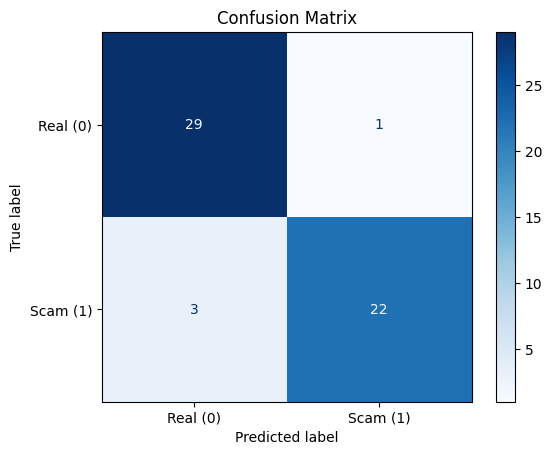

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real (0)', 'Scam (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Real', 'Scam']))



              precision    recall  f1-score   support

        Real       0.91      0.97      0.94        30
        Scam       0.96      0.88      0.92        25

    accuracy                           0.93        55
   macro avg       0.93      0.92      0.93        55
weighted avg       0.93      0.93      0.93        55

